경진대회 링크

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from scipy.stats import kde, gaussian_kde
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import tree

https://www.kaggle.com/code/andls555/heart-disease-prediction/notebook

* HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
* BMI : Body Mass Index (BMI).
* Smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).
* AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
* Stroke : (Ever told) (you had) a stroke?
* PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
* MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
* DiffWalking : Do you have serious difficulty walking or climbing stairs?
* Sex : Are you male or female?
* AgeCategory: Fourteen-level age category.
* Race : Imputed race/ethnicity value.
* Diabetic : (Ever told) (you had) diabetes?
* PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
* GenHealth : Would you say that in general your health is...
* SleepTime : On average, how many hours of sleep do you get in a 24-hour period?
* Asthma : (Ever told) (you had) asthma?
* KidneyDisease : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
* SkinCancer : (Ever told) (you had) skin cancer?

## Data Understanding

https://www.kaggle.com/code/hiiammrcat/heart-disease-data-understanding

In [4]:
df_hd = pd.read_csv(
    r'D:/dataset/Personal Key Indicators of Heart Disease/heart_2020_cleaned.csv')
df_hd

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [5]:
for feature in df_hd.columns:
    print(feature)
    print(df_hd[feature].unique(), "\n")

HeartDisease
['No' 'Yes'] 

BMI
[16.6  20.34 26.58 ... 62.42 51.46 46.56] 

Smoking
['Yes' 'No'] 

AlcoholDrinking
['No' 'Yes'] 

Stroke
['No' 'Yes'] 

PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 

MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.] 

DiffWalking
['No' 'Yes'] 

Sex
['Female' 'Male'] 

AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity
['Yes' 'No'] 

GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.] 

Asthma
['Yes' 'No'] 


In [7]:
# This data contain only non-null values, so the data is remove an missing data already
df_hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

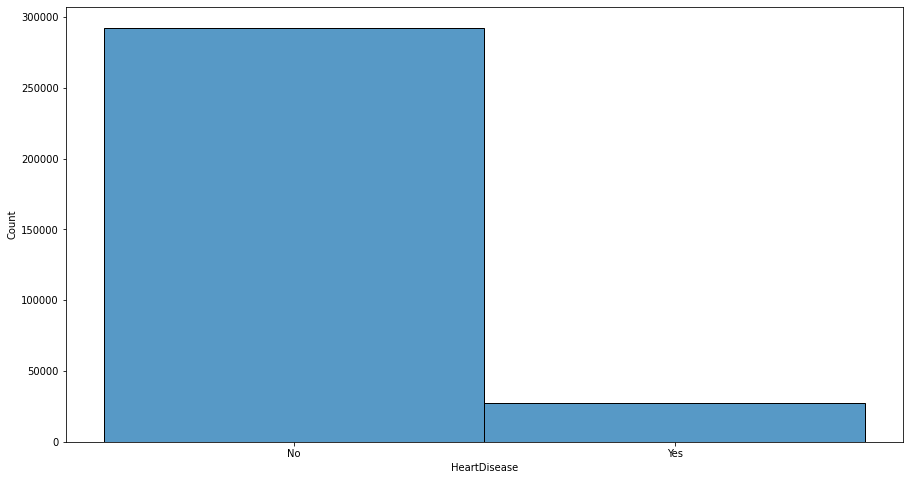

In [8]:
fig, axes = plt.subplots(figsize=(15, 8))
sns.histplot(ax=axes, data=df_hd.HeartDisease)
plt.show()

In [9]:
# => The data of people who have heart disease has only 8.56% in the dataset. This brings the unbalanced data problems

No_Value = df_hd.HeartDisease.value_counts()[0]
Yes_Value = df_hd.HeartDisease.value_counts()[1]
print("The number of Yes Value has {}%".format(((Yes_Value/len(df_hd))*100).round(2)))

The number of Yes Value has 8.56%


In [11]:
features = df_hd.columns
features

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [12]:
# Take out all features is binary data (Yes, No) and (Male, Female)
binary_feature = []

for feature in df_hd.columns:
    if np.isin(df_hd[feature].unique(), ["Yes", "No"]).all() or np.isin(df_hd[feature].unique(), ["Male", "Female"]).all():
        binary_feature.append(feature)

binary_feature

C:\Users\ehddn\AppData\Roaming\Python\Python37\site-packages\numpy\lib\arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'PhysicalActivity',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [13]:
# Take out all features is continuous data
continuos_feature = ["BMI"]

In [15]:
# Take out all features is discrete data
discrete_feature = features[~features.isin(binary_feature+continuos_feature)]
discrete_feature 

Index(['PhysicalHealth', 'MentalHealth', 'AgeCategory', 'Race', 'Diabetic',
       'GenHealth', 'SleepTime'],
      dtype='object')

### Binary data

In [16]:
df_hd[binary_feature].head(5)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,Yes,Yes,No,Yes
1,No,No,No,Yes,No,Female,Yes,No,No,No
2,No,Yes,No,No,No,Male,Yes,Yes,No,No
3,No,No,No,No,No,Female,No,No,No,Yes
4,No,No,No,No,Yes,Female,Yes,No,No,No


In [18]:
# Create the function to visualize to pie chart
def Draw_pie_chart(name_feature):

    fig, axes = plt.subplots(1, 2, figsize=(15, 8))
    labels = df_hd[name_feature].unique()

    axes[0].pie(df_hd[df_hd.HeartDisease == "No"]
                [name_feature].value_counts(), labels=labels, autopct='%1.1f%%')
    axes[0].set_title('No Heart Disease', fontsize=15)
    axes[1].pie(df_hd[df_hd.HeartDisease == "Yes"]
                [name_feature].value_counts(), labels=labels, autopct='%1.1f%%')
    axes[1].set_title('Yes Heart Disease', fontsize=15)

    plt.legend(title=name_feature, fontsize=15, title_fontsize=15)
    plt.show()

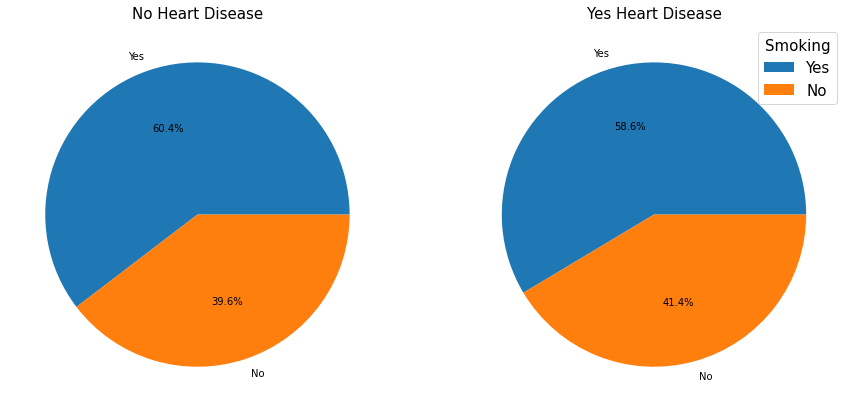

In [19]:
Draw_pie_chart("Smoking")

As I explore before, this is the unbalanced data because there only 8.56% people who have Heart Disease. However, in these two pie chart, the ratio between who have Smoking and who not Smoking in Heart Disease and No Heart Disease is the same. Most people who at least smoking 100 cigarettes still not get Heart Disease but also, people have Heart Disease also smoking 100 cigarettes. So does this mean the Smoking not affect to Heart Disease or there are something different in people smoking between two piechart

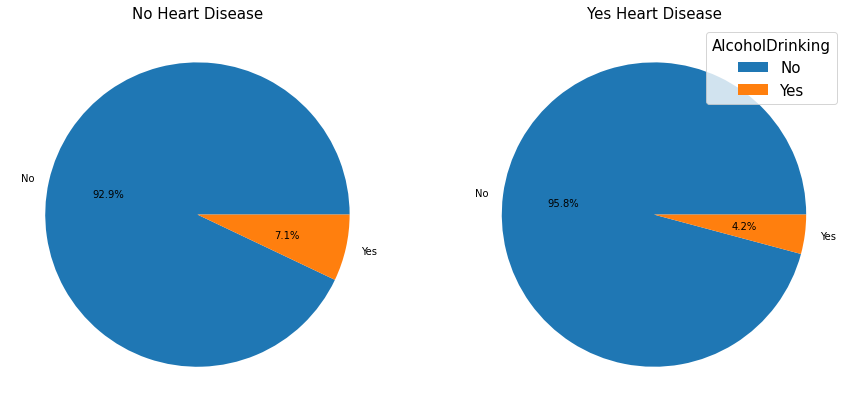

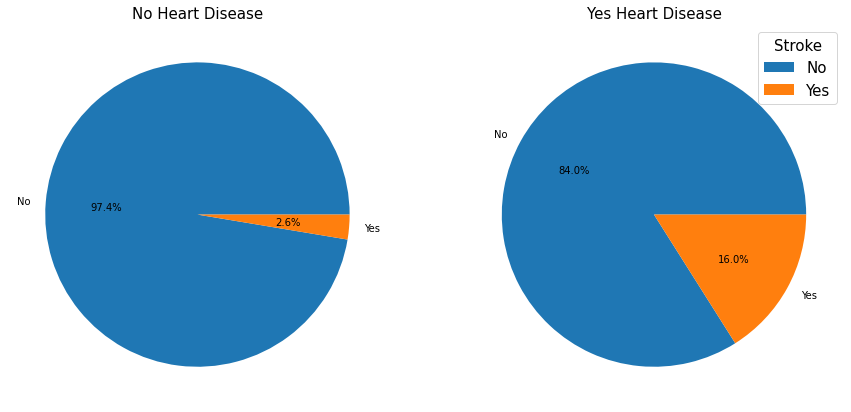

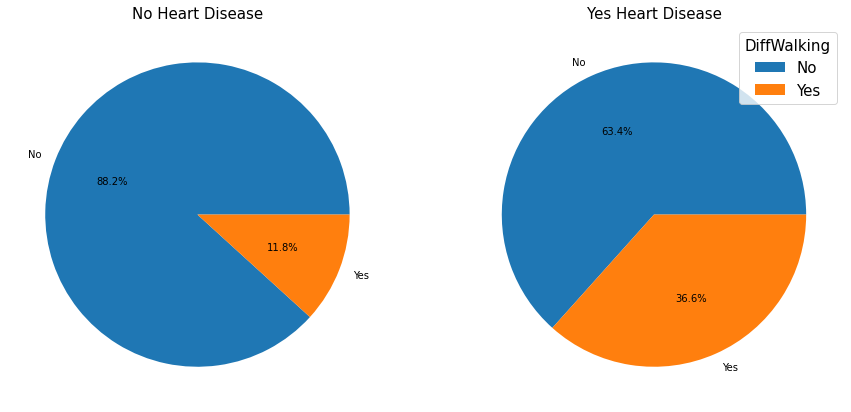

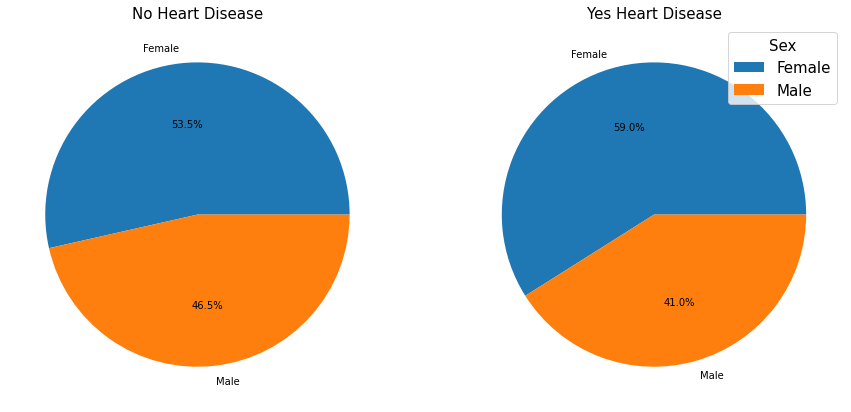

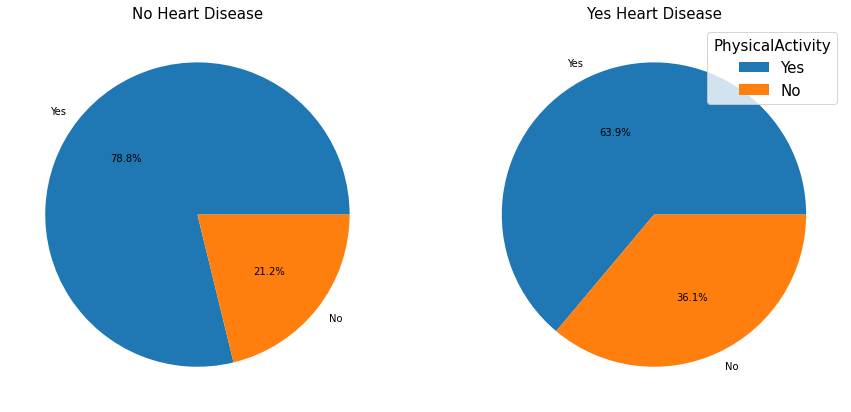

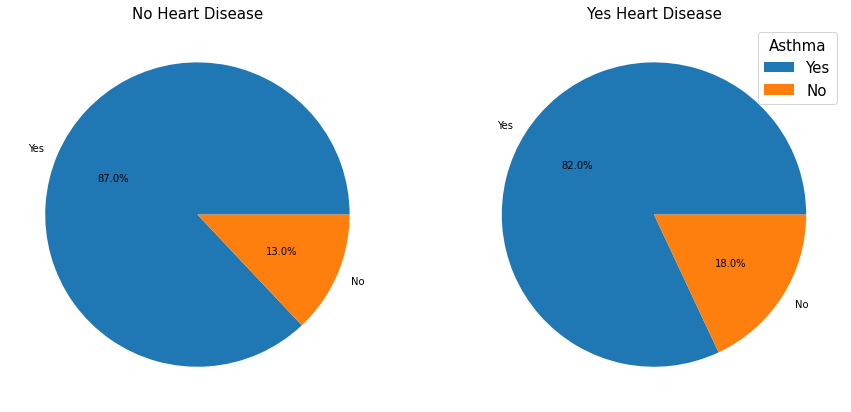

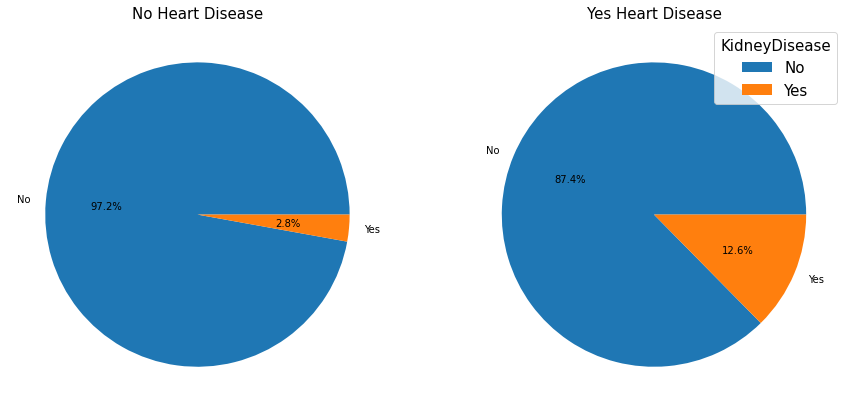

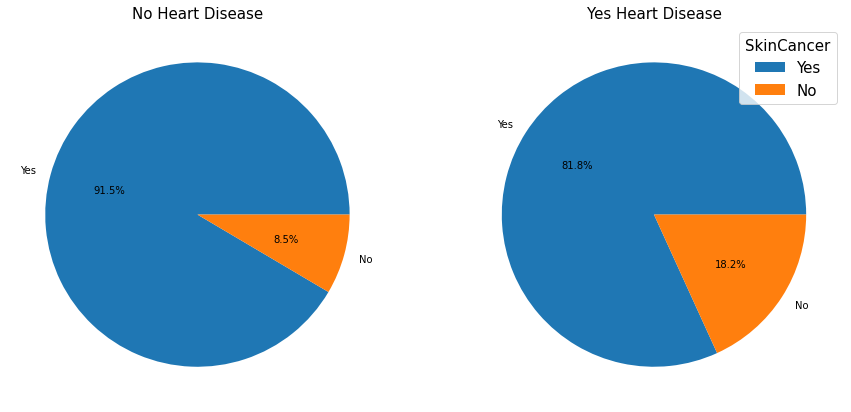

In [21]:
for feature in binary_feature[2:]:
    Draw_pie_chart(feature)

After visualize Pie Chart, we can see features like Stroke, DiffWalking, Physical Activity Kidney Disease and Skin Cancer affect most people who have Heart Disease than people who don't have Heart Disease. We can clearly see the distinguish ratio between two pie chart in these features. For example in Stroke Pie Charts we see 16% people who have Heart Disease (Ever told)(had) a stroke meanwhile the number in who don't have Heart Disease kind of small, only 2.6%. This very helpful feature when we want to predict Heart Disease or Not.

### Discrete data

In [22]:
df_hd[discrete_feature].head(5)

,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime
0,3.0,30.0,55-59,White,Yes,Very good,5.0
1,0.0,0.0,80 or older,White,No,Very good,7.0
2,20.0,30.0,65-69,White,Yes,Fair,8.0
3,0.0,0.0,75-79,White,No,Good,6.0
4,28.0,0.0,40-44,White,No,Very good,8.0


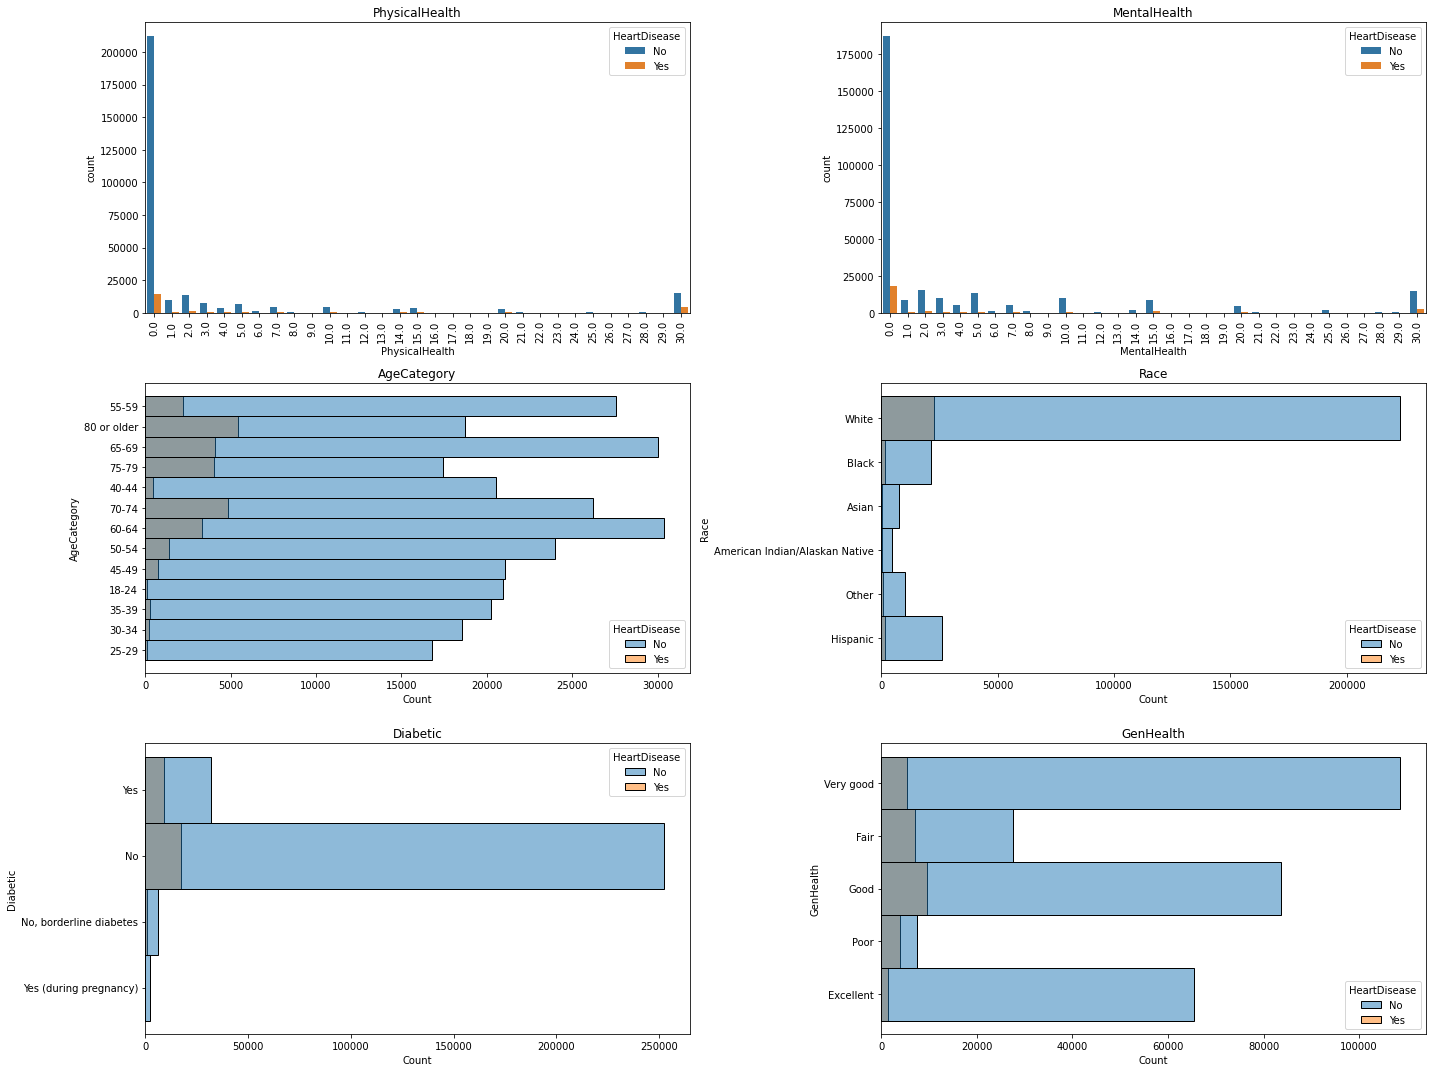

In [59]:
position_index = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
for position, feature in zip(position_index, discrete_feature):
    if 'lHealth' in feature:
        sns.countplot(ax=axes[position], x=feature, hue='HeartDisease', data=df_hd)
        axes[position].tick_params(axis='x', rotation=90)
    else:
        sns.histplot(ax=axes[position], y=feature, hue='HeartDisease', data=df_hd)
    axes[position].set_title(feature)

fig.tight_layout()
plt.show()

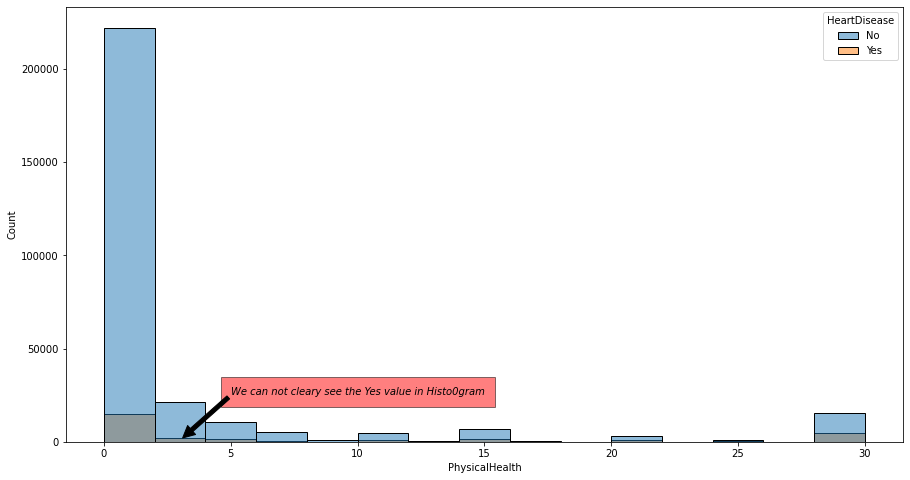

In [24]:
fig, axes = plt.subplots(figsize=(15, 8))
sns.histplot(ax=axes, bins=15, data=df_hd.sort_values(
    by="PhysicalHealth"), x="PhysicalHealth", hue="HeartDisease")
axes.text(5, 25000, 'We can not cleary see the Yes value in Histo0gram',
          style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
axes.annotate("", xy=(3, 843), xytext=(5, 25000),
              arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

The main problem here is we also want to see the distributed of discrete features in Heart Disease and No Heart Disease as we do for binary data. We can try plot hisogram with hue is Heart Disease but when we try for Physical Health, it not good solution because Heart Disease take only 8.56% so it hard to visualize along with No Heart Disease. This chart proves more about theunbalanced data in our data

### Continous data

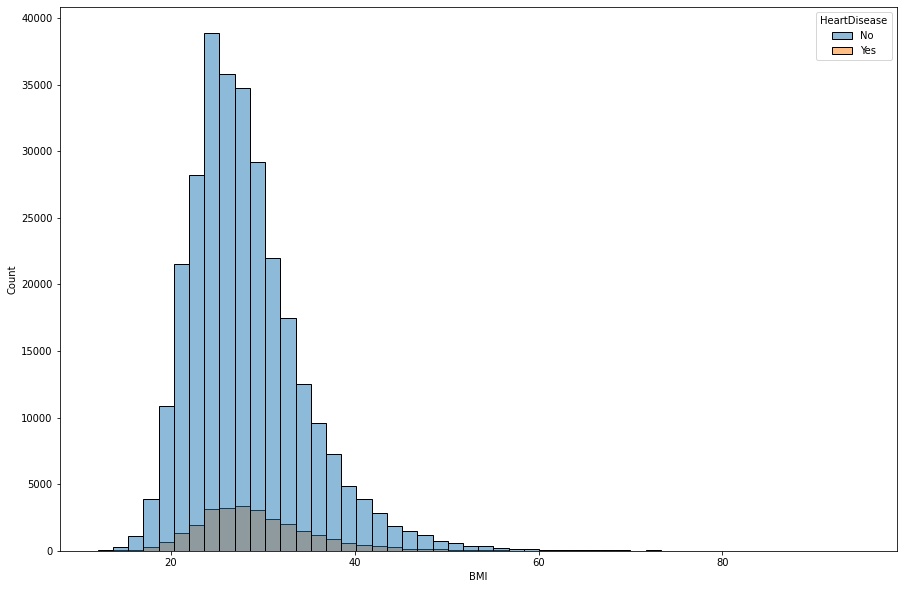

In [42]:
plt.figure(figsize=(15, 10))
sns.histplot(x='BMI', hue='HeartDisease', bins=50, data=df_hd[continuos_feature + ['HeartDisease']])
plt.show()

## Heart Disease Prediction
https://www.kaggle.com/code/andls555/heart-disease-prediction/notebook

In [68]:
df = df_hd.copy()

In [69]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


<AxesSubplot:>

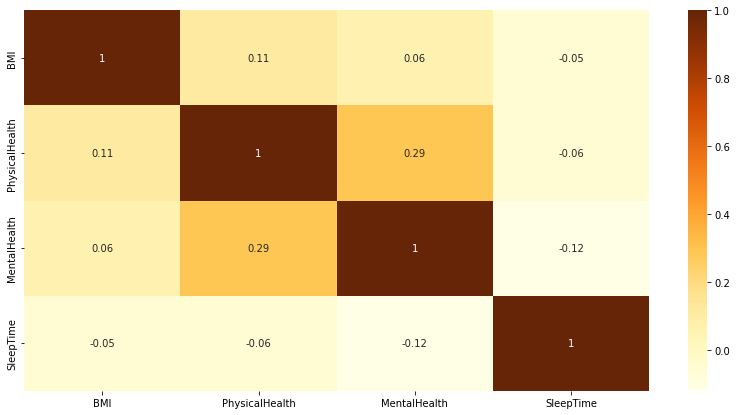

In [70]:
# Corr
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

### Data Preprocessing

#### Encoding

In [71]:
# 2개의 값만 있는 value 변환 (Yes -> 1, No -> 0, Male -> 1, Female -> 0)
# Diabetic은 4개 -> 2개로 변환

df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0


In [72]:
enc = OneHotEncoder() 

# Encoding categorical features 
categ = df[['AgeCategory', 'Race', 'GenHealth']]
encoded_categ = pd.DataFrame(enc.fit_transform(categ).toarray())

#Likning the encoed_cateh with the df
df = pd.concat([df, encoded_categ], axis = 1)

# Dropping the categorical features
df = df.drop(columns = ['AgeCategory', 'Race', 'GenHealth'], axis = 1)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,14,15,16,17,18,19,20,21,22,23
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [87]:
# feature name int -> str
df.columns = [str(col) for col in df.columns]
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'Diabetic',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23'],
      dtype='object')

#### Standardization

In [75]:
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime']
Scaler = StandardScaler()
df[num_cols] = Scaler.fit_transform(df[num_cols])
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,14,15,16,17,18,19,20,21,22,23
0,0,-1.844750,1,0,0,-0.046751,3.281069,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,-1.256338,0,0,1,-0.424070,-0.490039,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,-0.274603,1,0,0,2.091388,3.281069,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,-0.647473,0,0,0,-0.424070,-0.490039,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,-0.726138,0,0,0,3.097572,-0.490039,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Split Dataset for Training and Test

In [77]:
#Select Features
features = df.drop(columns =['HeartDisease'], axis = 1)

#Select Target 
target = df['HeartDisease']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, shuffle=True, test_size=.2, random_state=44)

#### SMOTE 적용한 Training and Test Dataset

In [88]:
# SMOTE oversampling
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print(X_train.shape, y_train.shape)
print(X_train_over.shape, y_train_over.shape)

C:\Users\ehddn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(255836, 38) (255836,)
(467818, 38) (467818,)


### Modeling

In [99]:
def evaluate_model(model, x_test, y_test):
    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}


def print_result(eval_name):
    print('Accuracy:', eval_name['acc'])
    print('Precision:', eval_name['prec'])
    print('Recall:', eval_name['rec'])
    print('F1 Score:', eval_name['f1'])
    print('Cohens Kappa Score:', eval_name['kappa'])
    print('Area Under Curve:',eval_name['auc'])
    print('Confusion Matrix:\n', eval_name['cm'])

#### KNN

In [90]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print_result(knn_eval)

C:\Users\ehddn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ehddn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ehddn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Accuracy: 0.9071123688613018
Precision: 0.35751295336787564
Recall: 0.11402864487697392
F1 Score: 0.17290825560350828
Cohens Kappa Score: 0.1373846447049204
Area Under Curve: 0.6994709858506478
Confusion Matrix:
 [[57397  1116]
 [ 4825   621]]


In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 5)

knn2.fit(X_train_over, y_train_over)

# Evaluate Model
knn_eval2 = evaluate_model(knn2, X_test, y_test)

# Print result
print_result(knn_eval2)

C:\Users\ehddn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ehddn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


#### Decision Tree

In [100]:
# Building Decision Tree model 
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print_result(clf_eval)

C:\Users\ehddn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Accuracy: 0.86560140089745
Precision: 0.2347591781744695
Recall: 0.2559676827029012
F1 Score: 0.2449051300070274
Cohens Kappa Score: 0.17129246113576335
Area Under Curve: 0.5895004835188936
Confusion Matrix:
 [[53969  4544]
 [ 4052  1394]]


C:\Users\ehddn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ehddn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [95]:
# Building Decision Tree model 
clf2 = tree.DecisionTreeClassifier(random_state=0)
clf2.fit(X_train_over, y_train_over)

# Evaluate Model
clf_eval2 = evaluate_model(clf2, X_test, y_test)

# Print result
print_result(clf_eval2)

C:\Users\ehddn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Accuracy: 0.8339717631607749
Precision: 0.19175306876415207
Recall: 0.2954461990451708
F1 Score: 0.2325648623256486
Cohens Kappa Score: 0.14418401931484615
Area Under Curve: 0.5899883769563116
Confusion Matrix:
 [[51731  6782]
 [ 3837  1609]]


C:\Users\ehddn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\ehddn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
